# Customer Shopping Trends Analysis

In [1]:
#importing the libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
df = pd.read_csv('shopping_trends_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Understanding the Data

In [3]:
#identifying columns in the dataset and their data types
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
#checking for null and missing values
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [5]:
#checking for duplicates in the dataset
df.duplicated().sum()

0

In [6]:
#getting summary statistics for the dataset
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


By analyzing the descriptive statistics, we can make several conclusions about the dataset.

The number of customers is 3,900.

The average age of the customers is 44.07.

The average purchase amount (USD) is 59.76.

The average review rating is 3.75.

The average number of previous purchases is 25.35.

The minimum and maximum age of the customers are 18 and 70, respectively.

The minimum and maximum purchase amount (USD) are 20 and 100, respectively.

The minimum and maximum review rating are 2.5 and 5.0, respectively.

The minimum and maximum number of previous purchases are 1 and 50, respectively.

## Exploratory Data Analysis

In [7]:
#getting the no. of unique values for different columns in the dataset
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].nunique())
    print("=" * 30)


Column: Customer ID
3900
Column: Age
53
Column: Gender
2
Column: Item Purchased
25
Column: Category
4
Column: Purchase Amount (USD)
81
Column: Location
50
Column: Size
4
Column: Color
25
Column: Season
4
Column: Review Rating
26
Column: Subscription Status
2
Column: Shipping Type
6
Column: Discount Applied
2
Column: Promo Code Used
2
Column: Previous Purchases
50
Column: Payment Method
6
Column: Frequency of Purchases
7


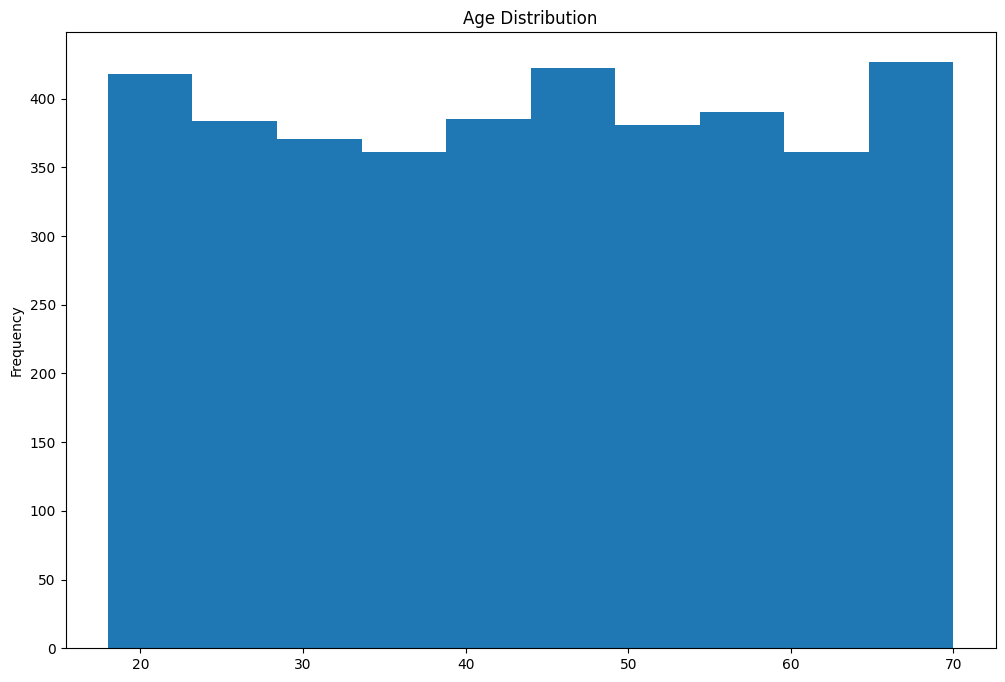

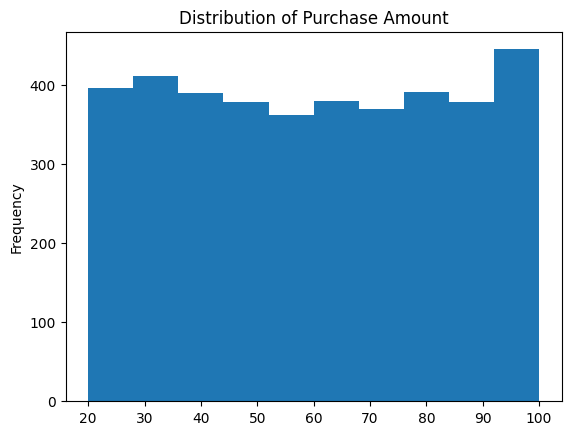

In [8]:
#visualizing the distribution of age and purchase amount

#setting the figure size
plt.figure(figsize=(12, 8))

#plotting a histogram to show the distribution of age
df['Age'].plot(kind='hist')
plt.title('Age Distribution')
plt.show()

#plotting a histogram to show purchase amount distribution
df['Purchase Amount (USD)'].plot(kind='hist')
plt.title("Distribution of Purchase Amount")
plt.show()

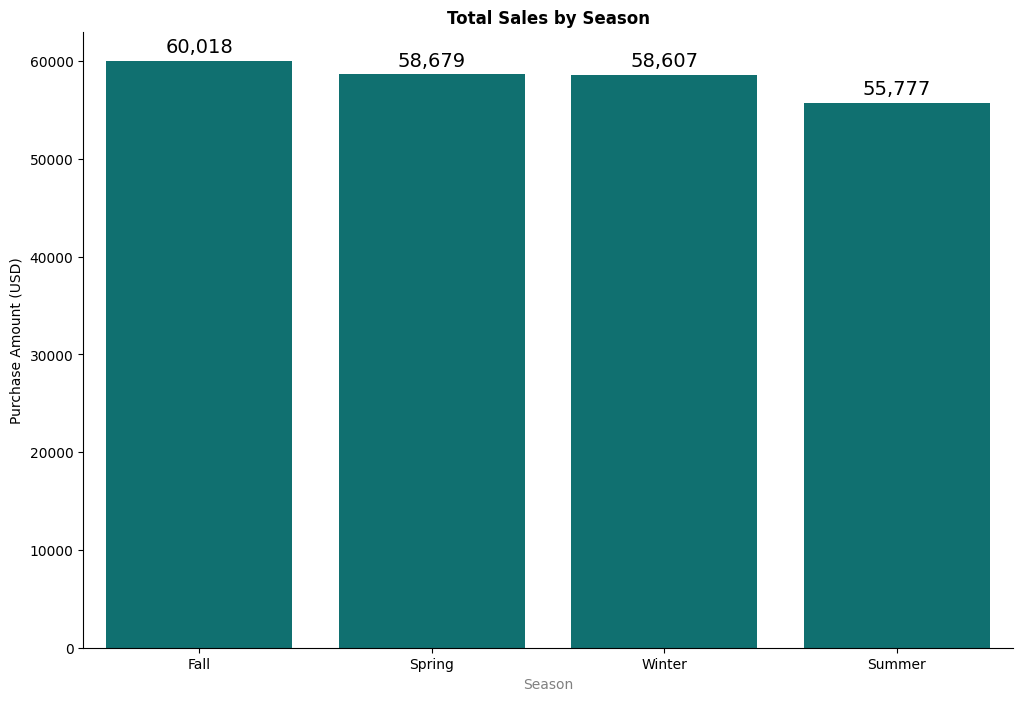

In [9]:
#visualizing the total sales per season

#setting the figure size
plt.figure(figsize=(12, 8))

#grouping the data by season
season_sales = df.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()

# Sorting the data by total sales in descending order
season_sales = season_sales.sort_values(by='Purchase Amount (USD)', ascending=False)

#plotting the data
ax = sns.barplot(x='Season', y='Purchase Amount (USD)', data=season_sales, color='teal')

#customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Total Sales by Season", fontweight='bold')
plt.xlabel("Season", color='gray')

#annotating the plot
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),  # type: ignore
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', 
                 va='bottom',
                 fontsize=14)
    
plt.show()

Fall ans Spring saw the most sales, while Summer recorded the lowest sales

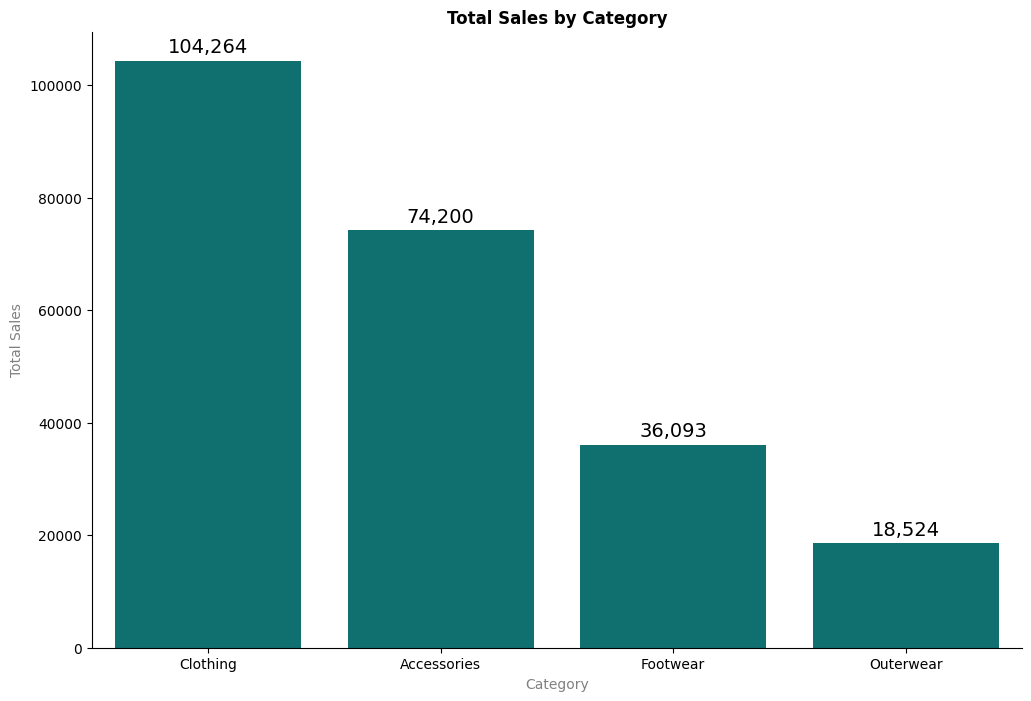

In [10]:
#visualizing the total sales by category

#setting the figure size
plt.figure(figsize=(12, 8))

#grouping the data by season
category_sales = df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()

# Sorting the data by total sales in descending order
category_sales = category_sales.sort_values(by='Purchase Amount (USD)', ascending=False)

#plotting the data
ax = sns.barplot(x='Category', y='Purchase Amount (USD)', data=category_sales, color='teal')

#customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.title("Total Sales by Category", fontweight='bold')
plt.xlabel("Category", color='gray')
plt.ylabel("Total Sales", color='gray')

#annotating the plot
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', 
                 va='bottom',
                 fontsize=14)
    
plt.show()

In [11]:
#grouping the data by gender
gender_sales = df.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

# Sorting the data by total sales in descending order
gender_sales = gender_sales.sort_values(by='Purchase Amount (USD)', ascending=False)

In [12]:
gender_sales

,Gender,Purchase Amount (USD)
1,Male,157890
0,Female,75191


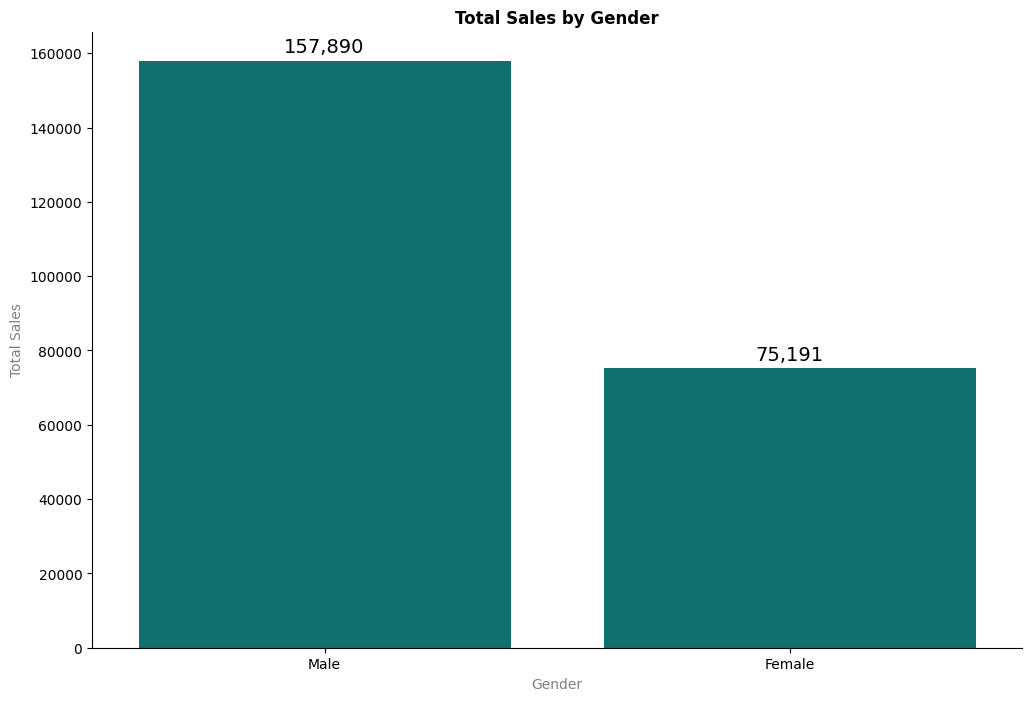

In [13]:
#visualizing the total sales by Gender

#setting the figure size
plt.figure(figsize=(12, 8))



#plotting the data
ax = sns.barplot(x='Gender', y='Purchase Amount (USD)', data=gender_sales, color='teal')

#customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.title("Total Sales by Gender", fontweight='bold')
plt.xlabel("Gender", color='gray')
plt.ylabel("Total Sales", color='gray')

#annotating the plot
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', 
                 va='bottom',
                 fontsize=14)
    
plt.show()

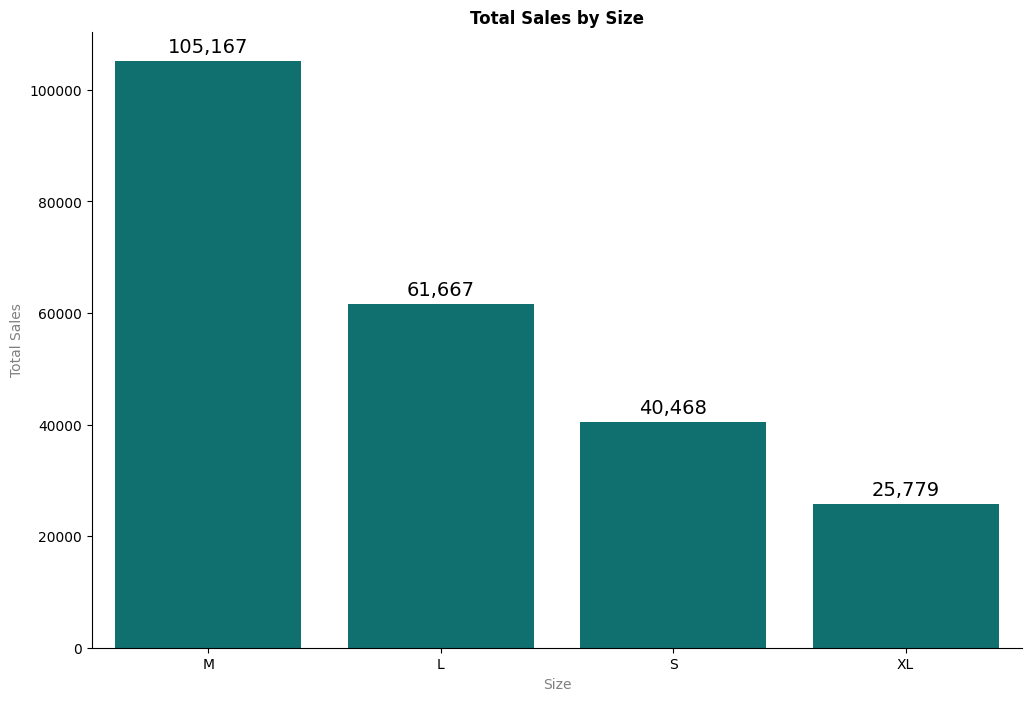

In [14]:
#visualizing the total sales by size

#setting the figure size
plt.figure(figsize=(12, 8))

#grouping the data by season
size_sales = df.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

# Sorting the data by total sales in descending order
size_sales = size_sales.sort_values(by='Purchase Amount (USD)', ascending=False)

#plotting the data
ax = sns.barplot(x='Size', y='Purchase Amount (USD)', data=size_sales, color='teal')

#customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.title("Total Sales by Size", fontweight='bold')
plt.xlabel("Size", color='gray')
plt.ylabel("Total Sales", color='gray')

#annotating the plot
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', 
                 va='bottom',
                 fontsize=14)
    
plt.show()

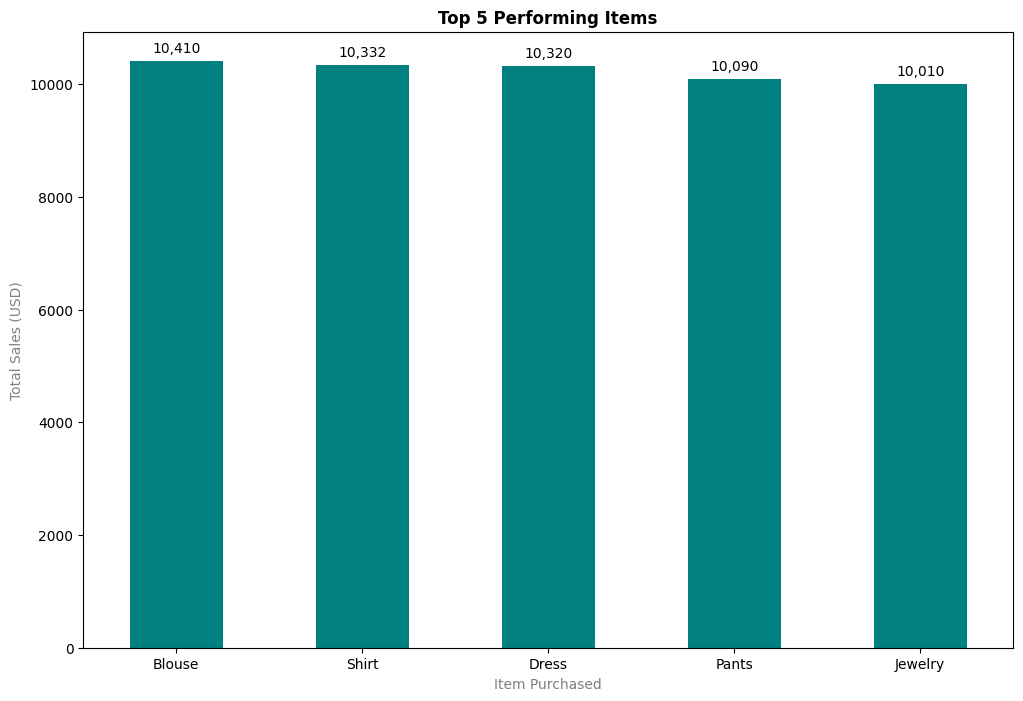

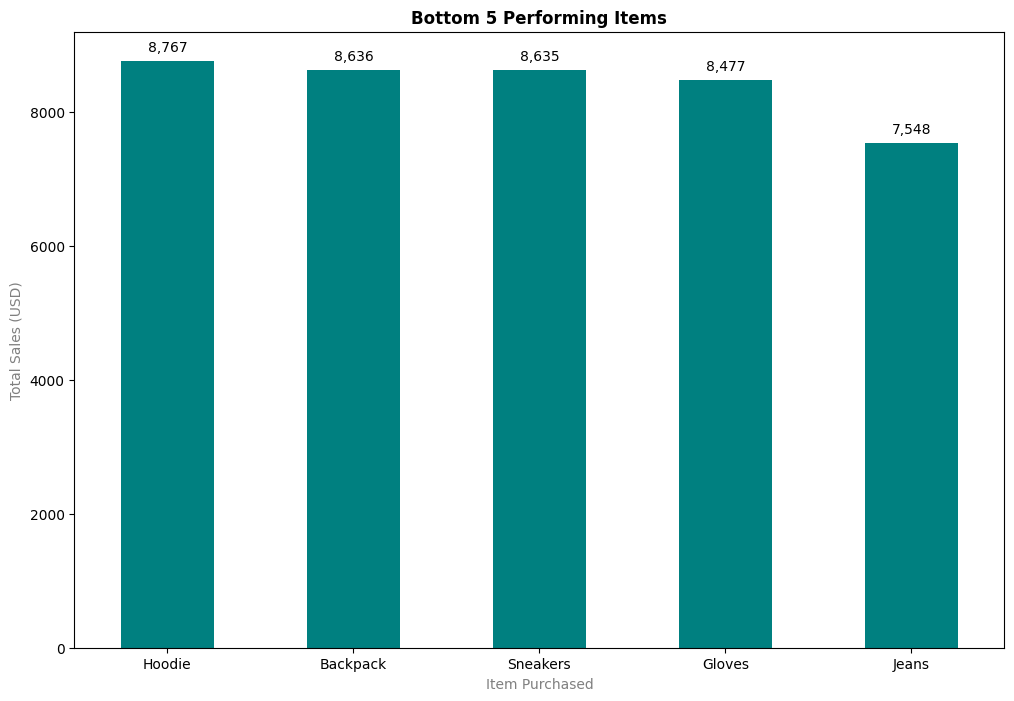

In [15]:
# Calculate total sales per item
item_sales = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum()

# Sort items by total sales in descending order
item_sales_sorted = item_sales.sort_values(ascending=False)

# Plotting the 5 best performing items
plt.figure(figsize=(12, 8))
top_items = item_sales_sorted.head(5)
ax = top_items.plot(kind='bar', color='teal')

# Adding annotations to the bars
for i, v in enumerate(top_items):
    ax.text(i, v + 100, f'{v:,.0f}', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Top 5 Performing Items', fontweight='bold')
plt.xlabel('Item Purchased', color='gray')
plt.ylabel('Total Sales (USD)', color='gray')
plt.xticks(rotation=0)
plt.show()

# Plotting the 5 least performing items
plt.figure(figsize=(12, 8))
bottom_items = item_sales_sorted.tail(5)
ax = bottom_items.plot(kind='bar', color='teal')

# Adding annotations to the bars
for i, v in enumerate(bottom_items):
    ax.text(i, v + 100, f'{v:,.0f}', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Bottom 5 Performing Items', fontweight='bold')
plt.xlabel('Item Purchased', color='gray')
plt.ylabel('Total Sales (USD)', color='gray')
plt.xticks(rotation=0)
plt.show()



<Figure size 1800x1200 with 0 Axes>

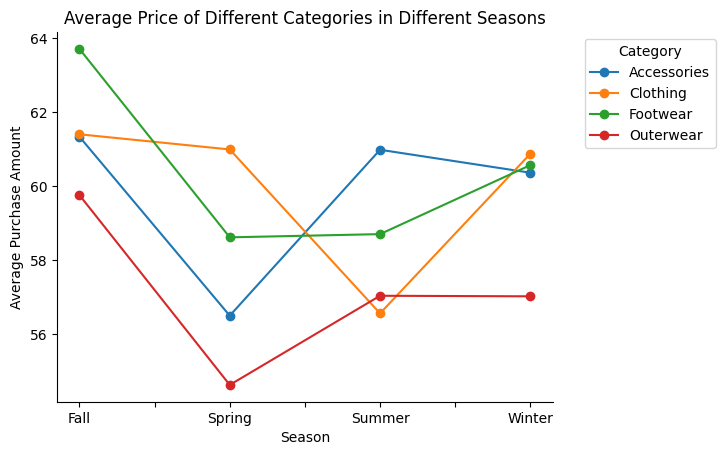

In [16]:
# Calculate the average purchase amount for each item and season
average_purchase_amount = df.pivot_table(values='Purchase Amount (USD)', index='Category', columns='Season', aggfunc='mean')

# Plot the average purchase amount for each item and season as a line plot
plt.figure(figsize=(18, 12))
ax = average_purchase_amount.T.plot(kind='line', marker='o', linestyle='-')
ax.set_title('Average Price of Different Categories in Different Seasons')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Season')
ax.set_ylabel('Average Purchase Amount')

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


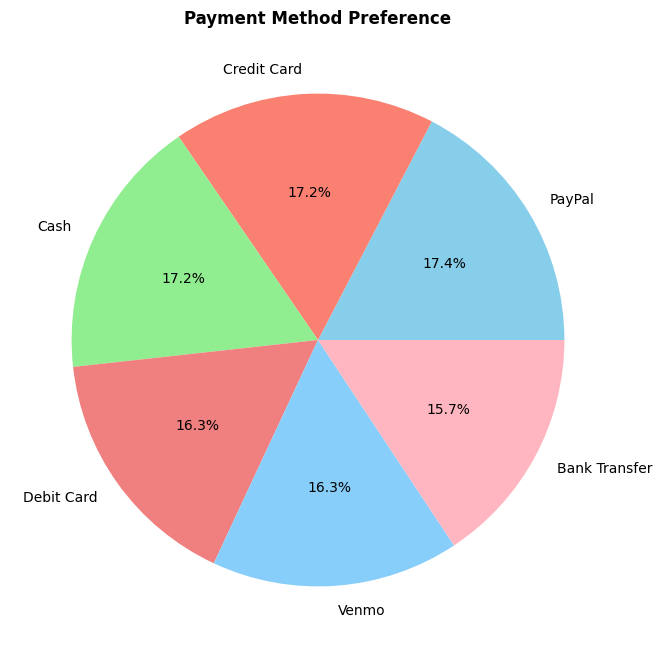

In [17]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# Plotting the data
ax = df['Payment Method'].value_counts().plot(kind='pie', colors=['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'], autopct='%1.1f%%')

# Customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Payment Method Preference", fontweight='bold')
plt.ylabel("")  # Removing the y-label

# Show the plot
plt.show()

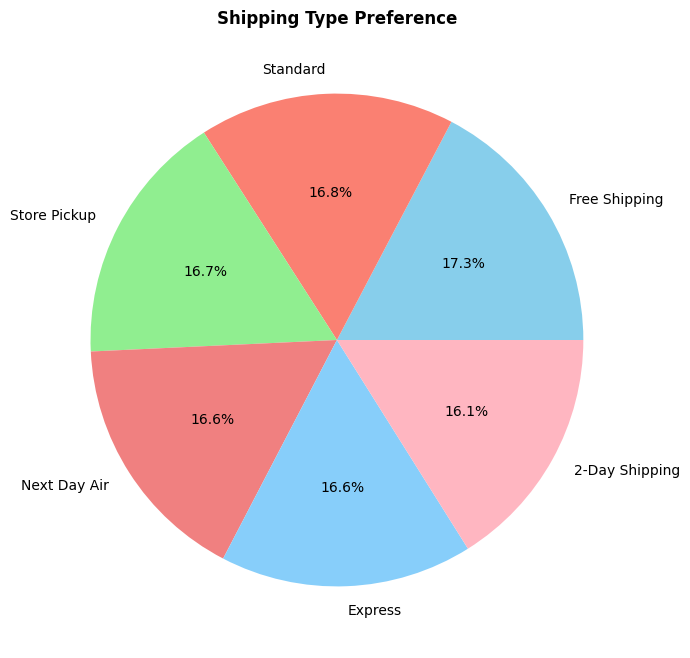

In [18]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# Plotting the data
ax = df['Shipping Type'].value_counts().plot(kind='pie', colors=['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'], autopct='%1.1f%%')

# Customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Shipping Type Preference", fontweight='bold')
plt.ylabel("")  # Removing the y-label

# Show the plot
plt.show()

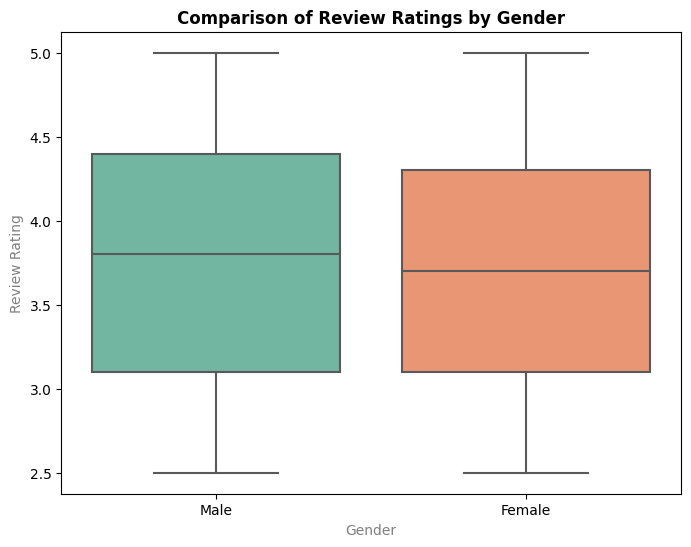

In [19]:
# Creating the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Review Rating', data=df, palette='Set2')

# Customizing the plot
plt.title('Comparison of Review Ratings by Gender', fontweight='bold')
plt.xlabel('Gender', color='gray')
plt.ylabel('Review Rating', color='gray')

plt.show()

Men tend to give higher ratings than Women

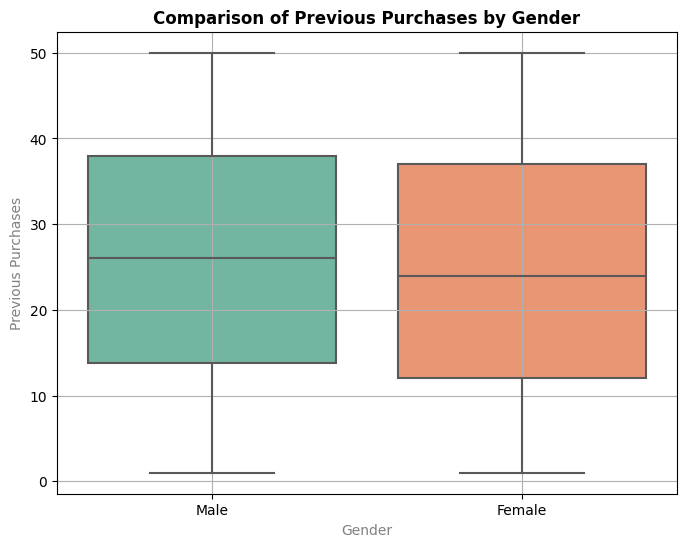

In [20]:
# Creating the violin plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Previous Purchases', data=df, palette='Set2')

# Customizing the plot
plt.title('Comparison of Previous Purchases by Gender', fontweight='bold')
plt.xlabel('Gender', color='gray')
plt.ylabel('Previous Purchases', color='gray')
plt.grid(True)
plt.show()


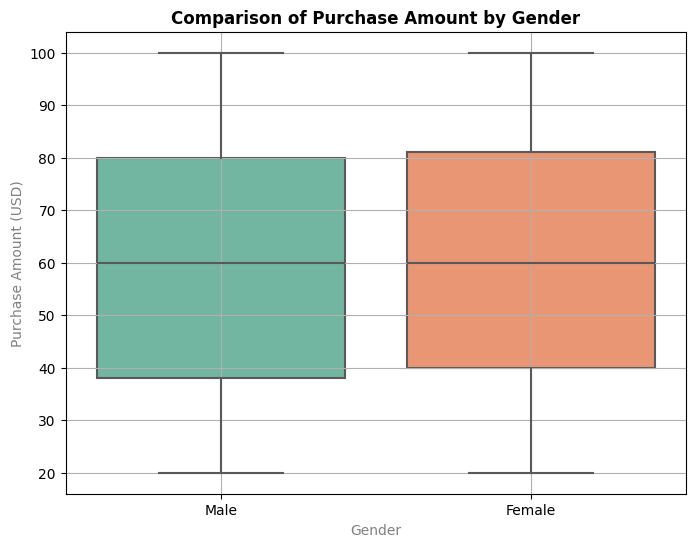

In [21]:
# Creating the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='Set2')

# Customizing the plot
plt.title('Comparison of Purchase Amount by Gender', fontweight='bold')
plt.xlabel('Gender', color='gray')
plt.ylabel('Purchase Amount (USD)', color='gray')
plt.grid(True)
plt.show()

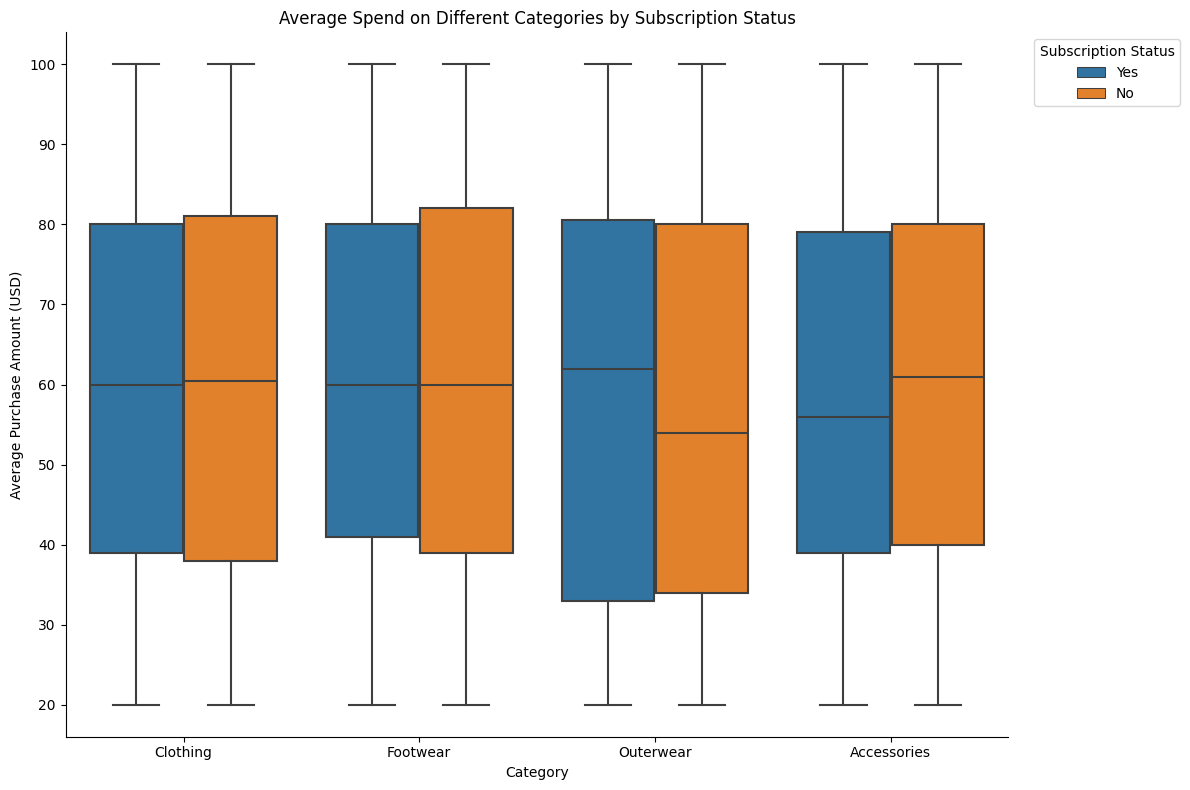

In [22]:
# Calculate the average spend for each category based on subscription status
avg_spend_by_category = df.groupby(['Category', 'Subscription Status'])['Purchase Amount (USD)'].mean().unstack()

# Plotting boxplots for each category based on subscription status
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Category', y='Purchase Amount (USD)', hue='Subscription Status', data=df)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Average Spend on Different Categories by Subscription Status')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=0)

plt.legend(title='Subscription Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


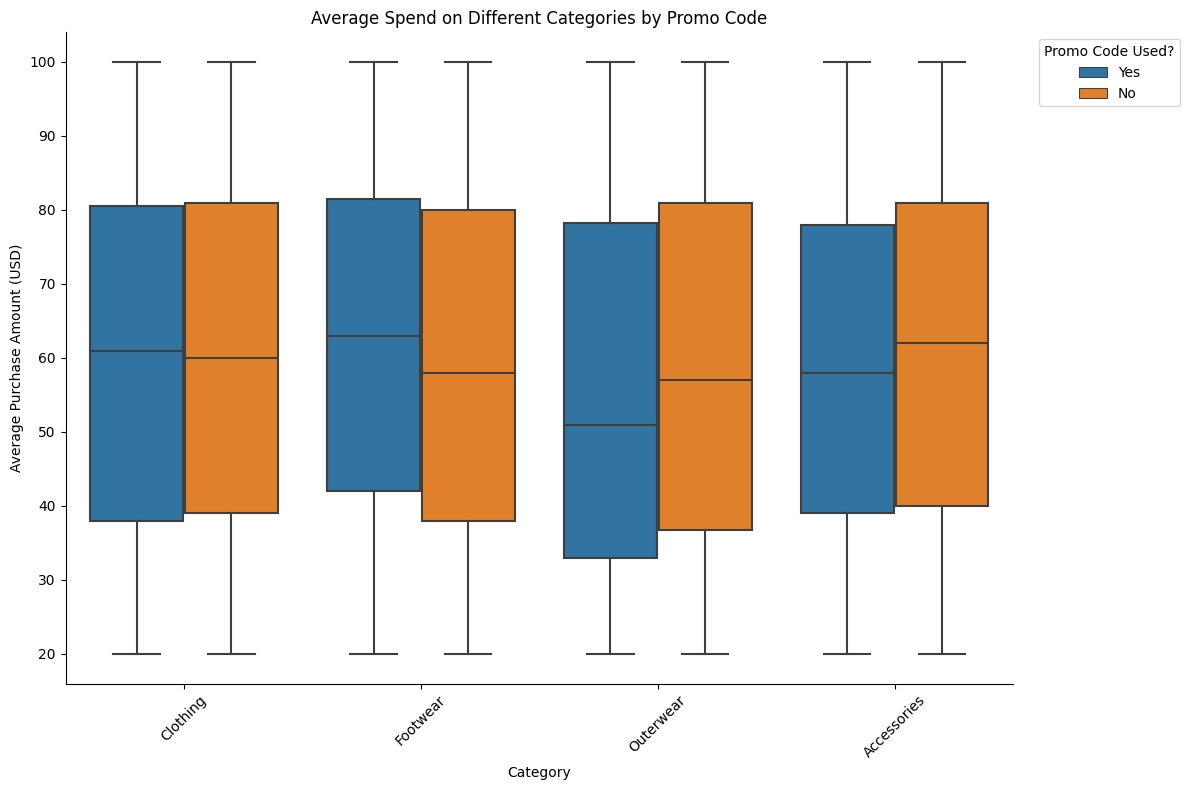

In [23]:
# Calculate the average spend for each category based on subscription status
avg_spend_by_category = df.groupby(['Category', 'Subscription Status'])['Purchase Amount (USD)'].mean().unstack()

# Plotting boxplots for each category based on subscription status
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Category', y='Purchase Amount (USD)', hue='Promo Code Used', data=df)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Average Spend on Different Categories by Promo Code')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)

plt.legend(title='Promo Code Used?', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


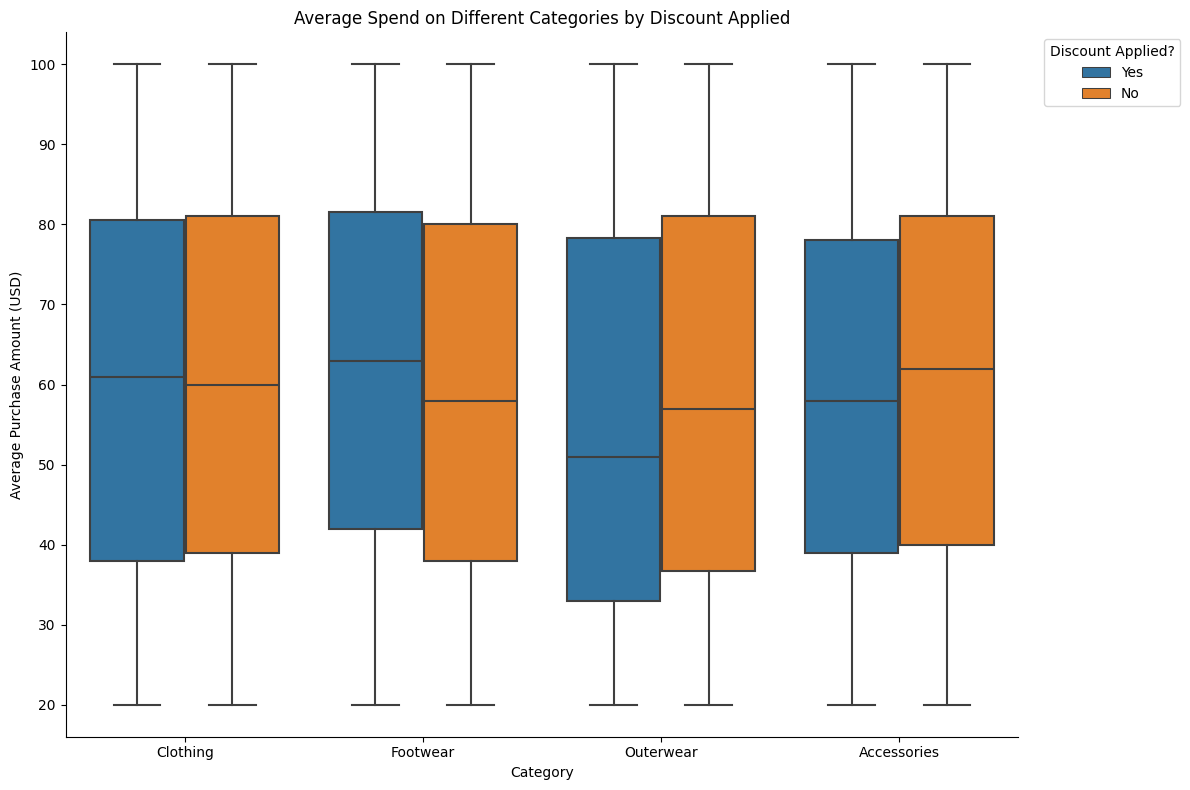

In [24]:
# Plotting boxplots for each category based on whether a discount was applied
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Category', y='Purchase Amount (USD)', hue='Discount Applied', data=df)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Average Spend on Different Categories by Discount Applied')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=0)

plt.legend(title='Discount Applied?', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

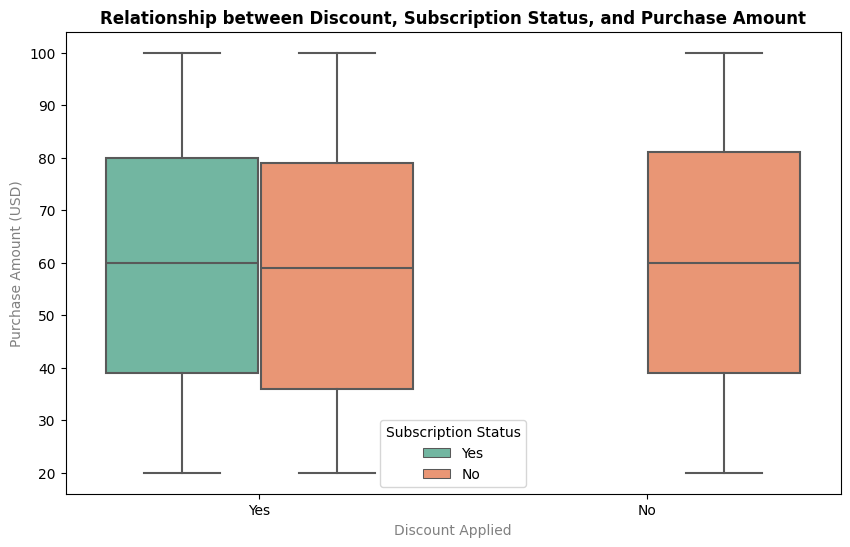

In [25]:
# Creating the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', hue='Subscription Status',
            data=df, palette='Set2')

# Customizing the plot
plt.title('Relationship between Discount, Subscription Status, and Purchase Amount', fontweight='bold')
plt.xlabel('Discount Applied', color='gray')
plt.ylabel('Purchase Amount (USD)', color='gray')
plt.legend(title='Subscription Status')

plt.show()

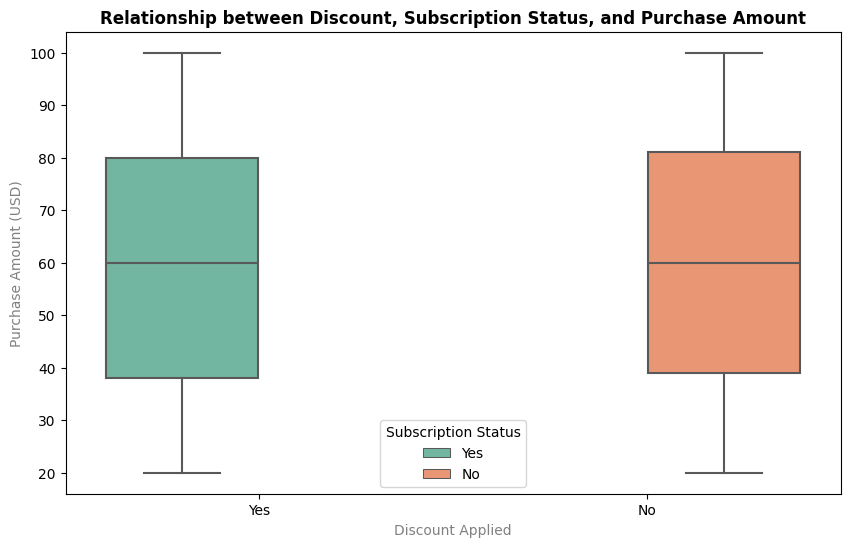

In [26]:
# Creating the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', hue='Promo Code Used',
            data=df, palette='Set2')

# Customizing the plot
plt.title('Relationship between Discount, Subscription Status, and Purchase Amount', fontweight='bold')
plt.xlabel('Discount Applied', color='gray')
plt.ylabel('Purchase Amount (USD)', color='gray')
plt.legend(title='Subscription Status')

plt.show()

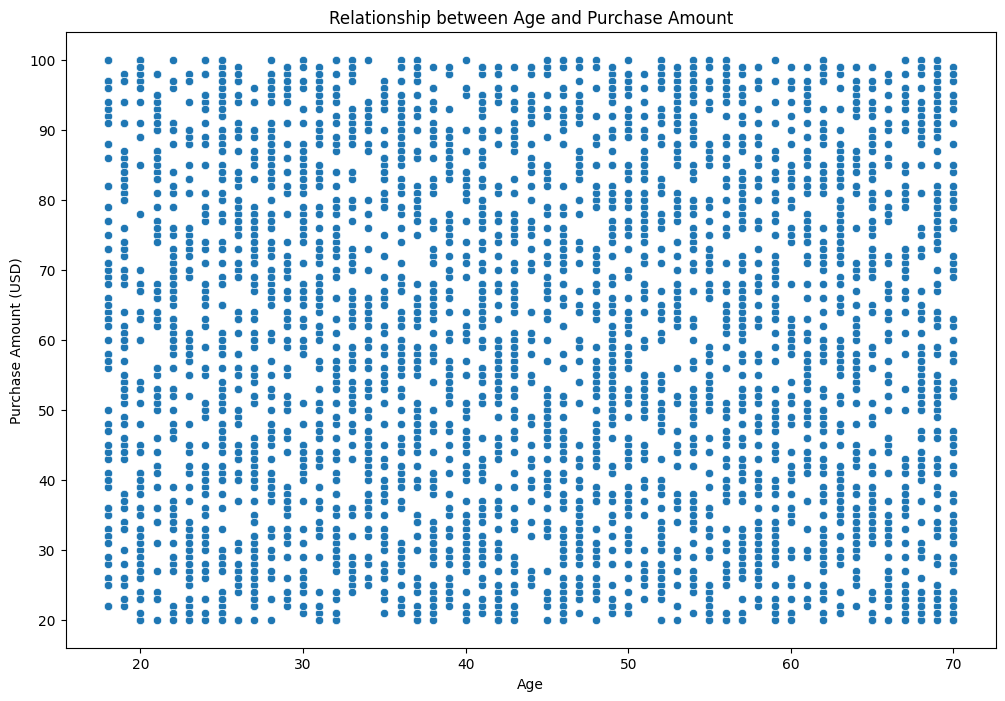

In [27]:
#visualizing average spend by age

#setting the figure size
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=df)
plt.title('Relationship between Age and Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

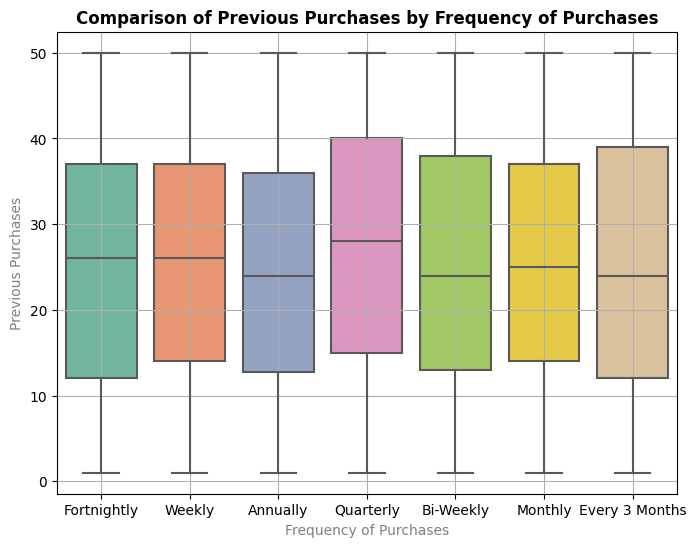

In [28]:
# Creating the violin plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Frequency of Purchases', y='Previous Purchases', data=df, palette='Set2')

# Customizing the plot
plt.title('Comparison of Previous Purchases by Frequency of Purchases', fontweight='bold')
plt.xlabel('Frequency of Purchases', color='gray')
plt.ylabel('Previous Purchases', color='gray')
plt.grid(True)
plt.show()

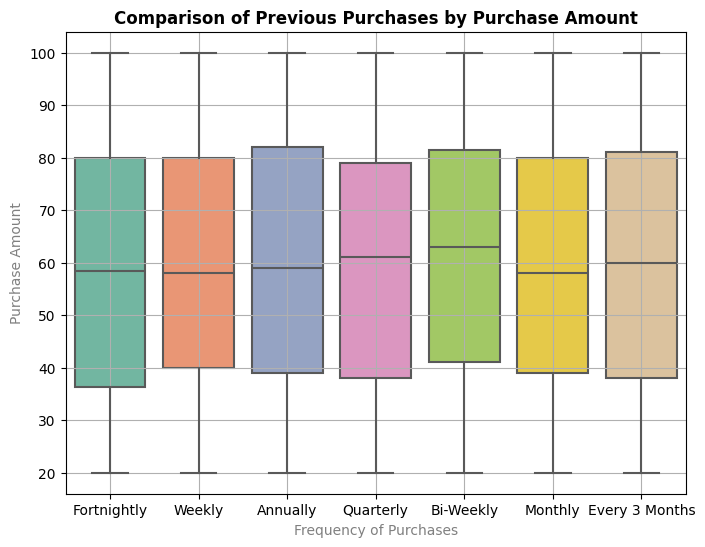

In [29]:
# Creating the violin plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Frequency of Purchases', y='Purchase Amount (USD)', data=df, palette='Set2')

# Customizing the plot
plt.title('Comparison of Previous Purchases by Purchase Amount', fontweight='bold')
plt.xlabel('Frequency of Purchases', color='gray')
plt.ylabel('Purchase Amount', color='gray')
plt.grid(True)
plt.show()

## Clustering

In [30]:
from sklearn.cluster import KMeans, Birch
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from scipy.cluster.vq import kmeans
from numpy import unique, where
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

### Data Preprocessing

In [31]:
df.drop(columns=['Customer ID'], inplace=True, axis=1)

In [32]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [33]:
#encoding categorical columns
input_labels = df[['Item Purchased', 'Category', 'Location', 'Size', 'Color',
                   'Season', 'Shipping Type', 'Payment Method', 'Frequency of Purchases', 
                   'Discount Applied', 'Promo Code Used', 'Subscription Status']]

encoder = preprocessing.LabelEncoder()
encoded_labels = input_labels.apply(lambda col: encoder.fit_transform(col))
encoded_labels

,Item Purchased,Category,Location,Size,Color,Season,Shipping Type,Payment Method,Frequency of Purchases,Discount Applied,Promo Code Used,Subscription Status
0,2,1,16,0,7,3,1,5,3,1,1,1
1,23,1,18,0,12,3,1,1,3,1,1,1
2,11,1,20,2,12,1,2,2,6,1,1,1
3,14,2,38,1,12,1,3,4,6,1,1,1
4,2,1,36,1,21,1,2,4,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3895,9,1,45,0,21,2,0,5,6,0,0,0
3896,0,0,14,0,23,1,5,0,1,0,0,0
3897,1,0,29,0,8,1,4,5,5,0,0,0
3898,17,2,22,2,3,2,1,5,6,0,0,0


In [43]:
from sklearn.preprocessing import StandardScaler

numerical_columns = df[['Age', 'Purchase Amount (USD)', 'Previous Purchases']]

scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_columns)
numerical_scaled

array([[ 0.71891344, -0.28562864, -0.78583067],
       [-1.64862924,  0.17885219, -1.61655226],
       [ 0.39008807,  0.55888195, -0.16278948],
       ...,
       [ 0.12702777, -1.13013923, -0.09356268],
       [-0.00450238,  0.72778407, -0.09356268],
       [ 0.52161822,  0.89668619,  0.52947851]])

In [42]:
#merging the preprocessed data
data = pd.concat([encoded_labels, numerical_columns], axis=1)
data

,Item Purchased,Category,Location,Size,Color,Season,Shipping Type,Payment Method,Frequency of Purchases,Discount Applied,Promo Code Used,Subscription Status,Age,Purchase Amount (USD),Previous Purchases
0,2,1,16,0,7,3,1,5,3,1,1,1,55,53,14
1,23,1,18,0,12,3,1,1,3,1,1,1,19,64,2
2,11,1,20,2,12,1,2,2,6,1,1,1,50,73,23
3,14,2,38,1,12,1,3,4,6,1,1,1,21,90,49
4,2,1,36,1,21,1,2,4,0,1,1,1,45,49,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,9,1,45,0,21,2,0,5,6,0,0,0,40,28,32
3896,0,0,14,0,23,1,5,0,1,0,0,0,52,49,41
3897,1,0,29,0,8,1,4,5,5,0,0,0,46,33,24
3898,17,2,22,2,3,2,1,5,6,0,0,0,44,77,24


In [45]:
#kmeans clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
clusters = kmeans.predict(data)

In [47]:
silhouette_scores = silhouette_score(data, clusters)
print(f'Silhouette Score: {silhouette_scores}')

Silhouette Score: 0.1631107294070817
